In [27]:
    if params.sampwidth == 4 and params.sample_width() == 32:
            # Read the audio data
        audio_data = wave_file.readframes(params.nframes)
                
        # Convert the binary audio data to a numpy array of 32-bit floats
        audio_array = np.frombuffer(audio_data, dtype=np.float32)

In [33]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
import struct

directory_path = r'C:\Users\lucas\Documents\Uni\deep_learning\project\dataset\first_test_data'

# Get a list of all files in the directory
files = os.listdir(directory_path)

# Filter for WAV files
wav_files = [file for file in files if file.endswith('.wav')]

# Target length
target_length = 64000

samples = []

# Loop through each WAV file
for wav_file_name in wav_files:
    
    # Combine the directory path and WAV file name
    file_path = os.path.join(directory_path, wav_file_name)
    
    #print("Processing file:", wav_file_name)

    # Open the WAV file
    with wave.open(file_path, 'rb') as wave_file:
        # Get the parameters of the WAV file
        params = wave_file.getparams()

        # Ensure the file is 24-bit
        if params.sampwidth == 3:
            # Read the audio data
            audio_data = wave_file.readframes(params.nframes)

            # Unpack 24-bit data into a NumPy array of 32-bit floats
            num_bytes = params.nframes * params.sampwidth
            format_string = f"{num_bytes}B"  # Use 'B' for unsigned bytes

            unpacked_data = struct.unpack(format_string, audio_data)
            audio_array = np.array(unpacked_data, dtype=np.uint8)

            # Convert to 32-bit float and normalize to the range [-1, 1]
            audio_array = audio_array.astype(np.int32)
            audio_array = (audio_array[::3] + (audio_array[1::3] << 8) + (audio_array[2::3] << 16))
            audio_array = audio_array.astype(np.float32) / (2**23 - 1)

            # Trim or pad to the target length
            if len(audio_array) < target_length:
                # Pad with zeros if the length is less than the target
                audio_array = np.pad(audio_array, (0, target_length - len(audio_array)))
            else:
                # Trim to the target length
                audio_array = audio_array[:target_length]
                
            samples.append(audio_array)

print("Number of samples:", len(samples))

audioDF = pd.DataFrame(samples)


Number of samples: 48


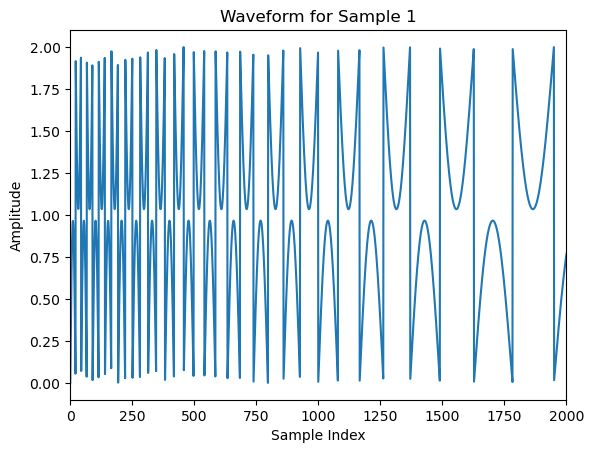

In [32]:
for i, audio_sample in enumerate(samples[:1]):
    plt.figure()
    plt.plot(audio_sample)
    plt.title(f'Waveform for Sample {i + 1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.xlim(0, 2000)  # Set the x-axis limit to 2000
    plt.show()

In [4]:
output_directory = r'C:\Users\lucas\Documents\Uni\deep_learning\project\dataset\output_wav_files'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)
